#RNA family characterization

Application scenario: we want to characterize RNA family, identifying regions with their structural contexts that are characteristic of the family

In [1]:
%matplotlib inline

In [2]:
import logging
from eden.util import configure_logging
configure_logging(logging.getLogger(), verbosity=2)

given the RFAM id of a family we retrieve it from the RFAM online database
composing the correspondent URL

In [3]:
def rfam_uri(family_id):
    return '%s.fa'%(family_id)
def rfam_uri(family_id):
    return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)

In [4]:
rfam_id = 'RF00871' #microRNA mir-689

In [5]:
rfam_id = 'RF02275' #Hammerhead_HH9

In [6]:
rfam_id = 'RF00380' #

In [7]:
rfam_id = 'RF00005' #tRNA

In [8]:
#parameters for visualization
opts={'size':14, 'node_border':False, 'node_size':200, 'font_size':9, 'vertex_alpha':0.6}

from eden.util.display import draw_graph, serialize_graph
import itertools
def plot(graphs, num=3, file_name=None, opts=None):    
    graphs = itertools.islice(graphs,num)
    for i,graph in enumerate(graphs): 
        if file_name is not None:
            draw_graph(graph, file_name=file_name+str(i)+'.png', **opts)
        else:
            draw_graph(graph, **opts)

In [9]:
def pre_process(data):
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(data)
    
    from eden.converter.fasta import sequence_to_eden
    graphs = sequence_to_eden(seqs)

    from eden.modifier.graph import vertex_attributes 
    graphs = vertex_attributes.colorize(graphs, output_attribute = 'level', labels = ['A','U','C','G'])
    
    return graphs

Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF00005/alignment?acc=RF00005&format=fastau&download=0 HTTP/1.1" 200 90476


/Library/Python/2.7/site-packages/pygraphviz/agraph.py:1281: RuntimeWarning: Fontconfig warning: ignoring UTF-8: not a valid region tag

  warnings.warn("".join(errors),RuntimeWarning)


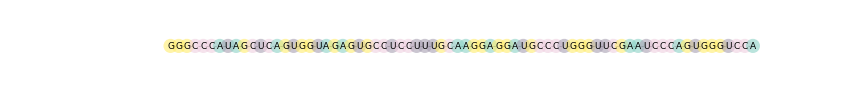

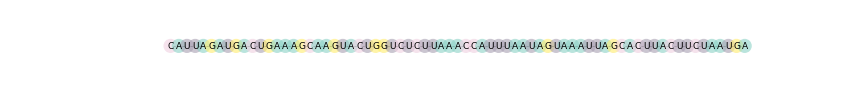

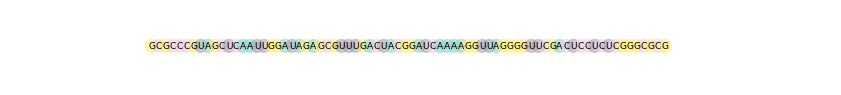

In [10]:
graphs = pre_process(rfam_uri(rfam_id))
my_opt=dict(opts)
my_opt.update({'vertex_color':'level', 'colormap':'Set3', 'prog':'circo', 'size_x_to_y_ratio':10})
plot(graphs,opts=my_opt)

In [10]:
def pre_process(data):
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(data)
   
    from eden.converter.rna.rnashapes_struct import rnashapes_struct_to_eden
    graphs = rnashapes_struct_to_eden(seqs, energy=True, shape=True, dotbracket=True, split_components=False, shape_type=5, energy_range=35, max_num=3)

    from eden.modifier.graph import vertex_attributes 
    graphs = vertex_attributes.colorize(graphs, output_attribute = 'level', labels = ['.','(',')','[',']','x','0','1','2','3','4','5','6','7','8','9'])
    
    return graphs

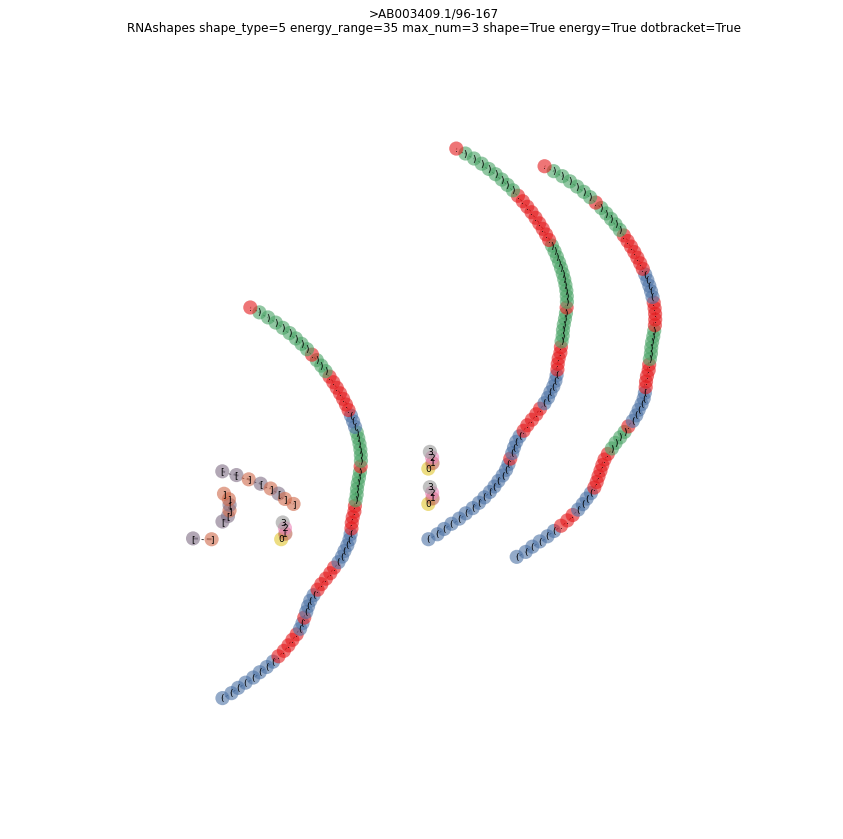

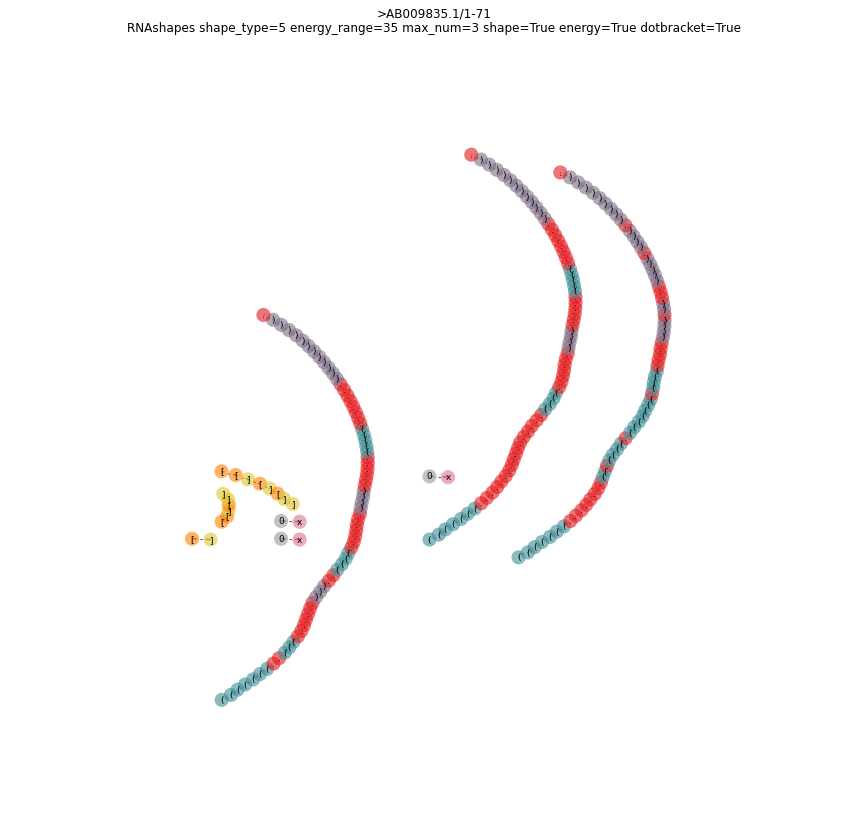

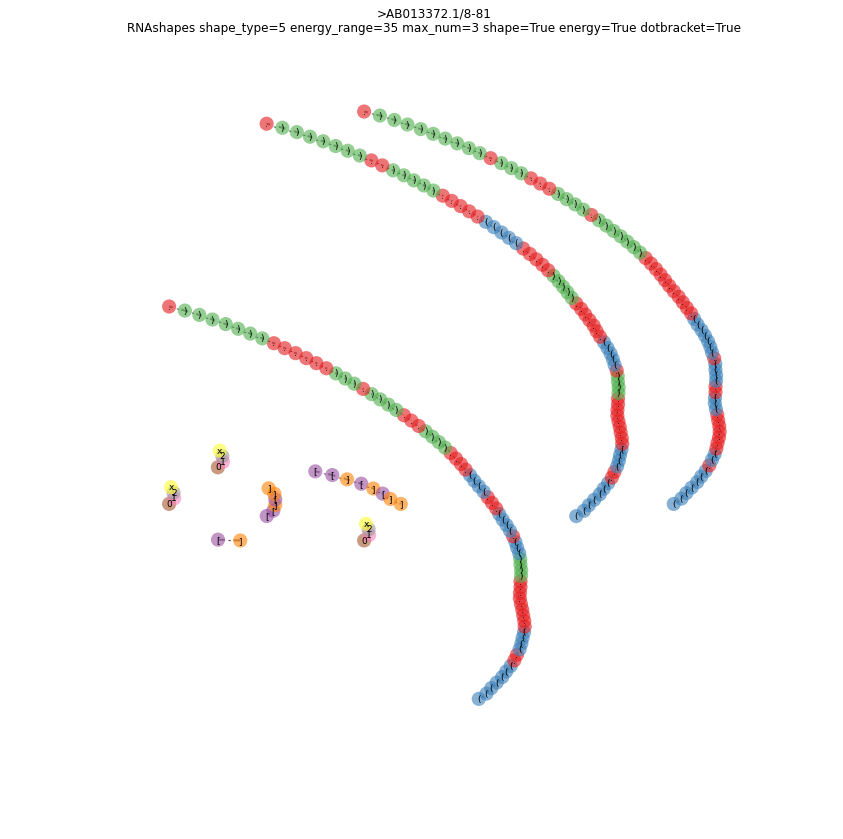

In [11]:
graphs = pre_process(rfam_uri(rfam_id))
my_opt=dict(opts)
my_opt.update({'vertex_color':'level', 'colormap':'Set1'})
plot(graphs,opts=my_opt)

In [11]:
def pre_process(data):
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(data)
    
    from eden.converter.rna.rnafold import rnafold_to_eden
    graphs = rnafold_to_eden(seqs)

    from eden.modifier.graph import vertex_attributes
    graphs = vertex_attributes.trapezoidal_reweighting(graphs,
                                                       high_weight = 1, low_weight = 0.0, 
                                                       high_weight_window_start = 20, high_weight_window_end = 30, 
                                                       low_weight_window_start = 10, low_weight_window_end = 40)
    return graphs

Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF00005/alignment?acc=RF00005&format=fastau&download=0 HTTP/1.1" 200 90476


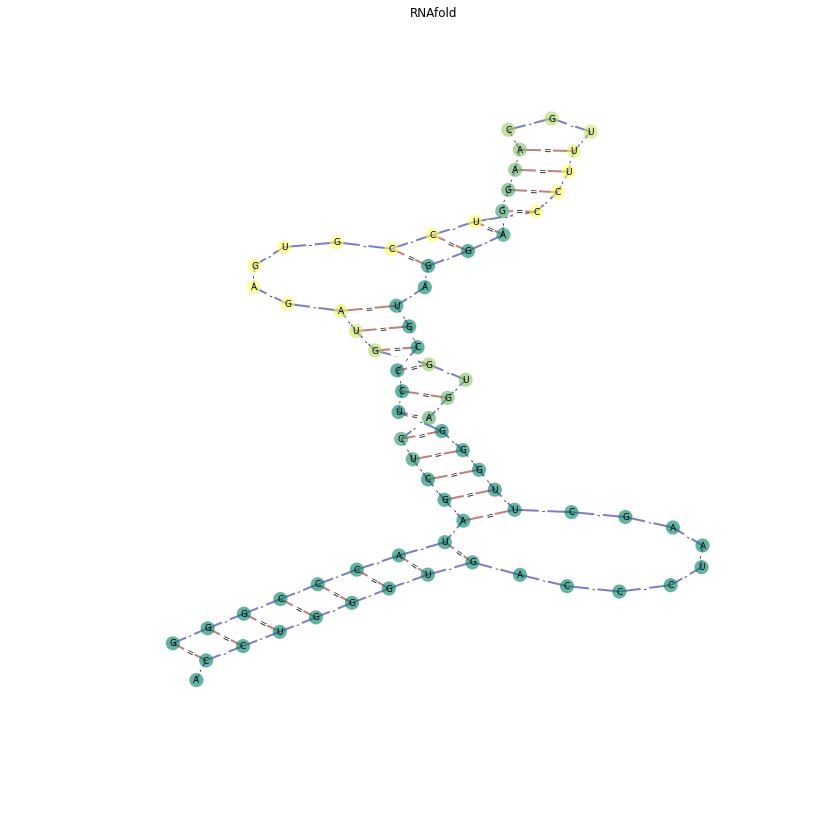

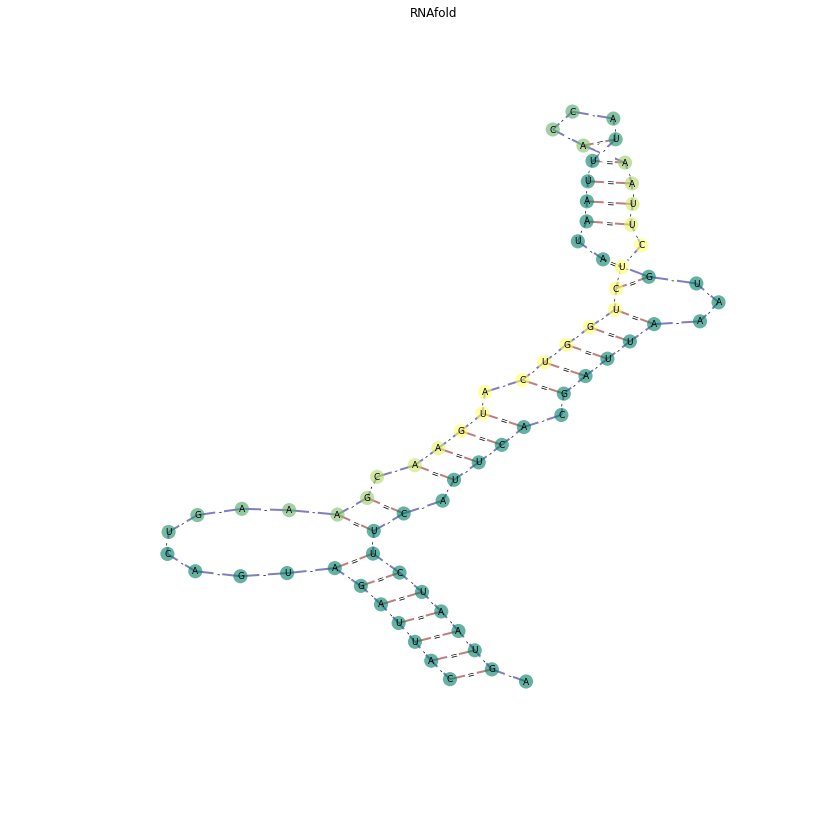

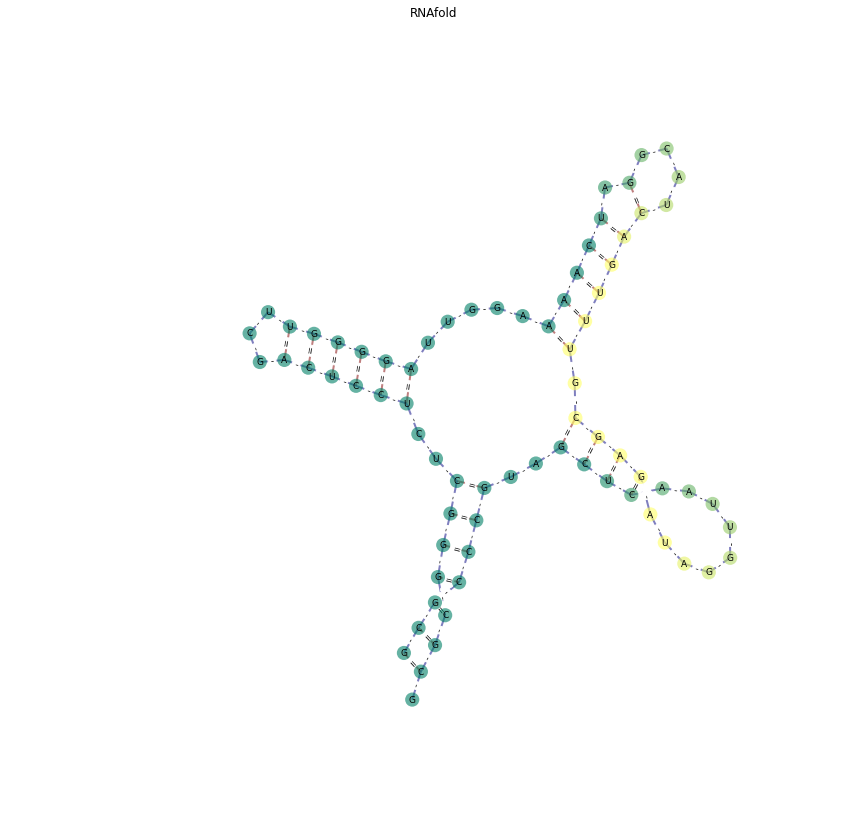

In [18]:
graphs = pre_process(rfam_uri(rfam_id))
my_opt=dict(opts)
my_opt.update({'vertex_color':'weight', 'colormap':'summer', 'edge_color':'_labels_'})
plot(graphs,opts=my_opt)

In [14]:
def pre_process(data):
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(data)
    
    from eden.converter.rna.rnaplfold import rnaplfold_to_eden
    graphs = rnaplfold_to_eden(seqs, window_size = 150, max_bp_span = 100, avg_bp_prob_cutoff = 0.05, max_num_edges = 3)

    from eden.modifier.graph import vertex_attributes 
    graphs = vertex_attributes.colorize(graphs, output_attribute = 'level', labels = ['A','U','C','G'])

    return graphs

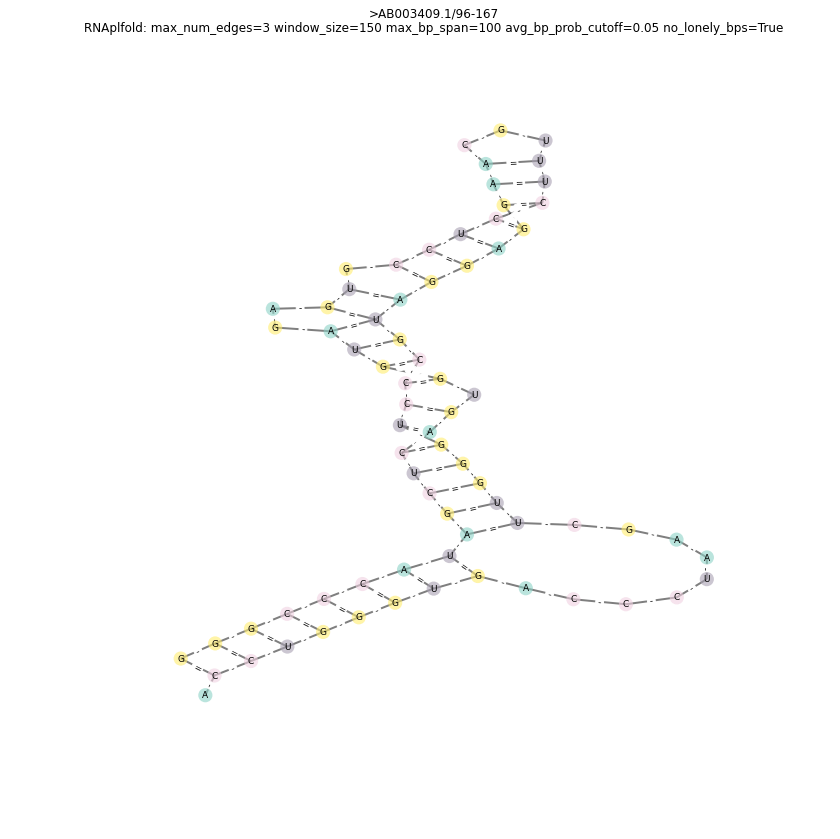

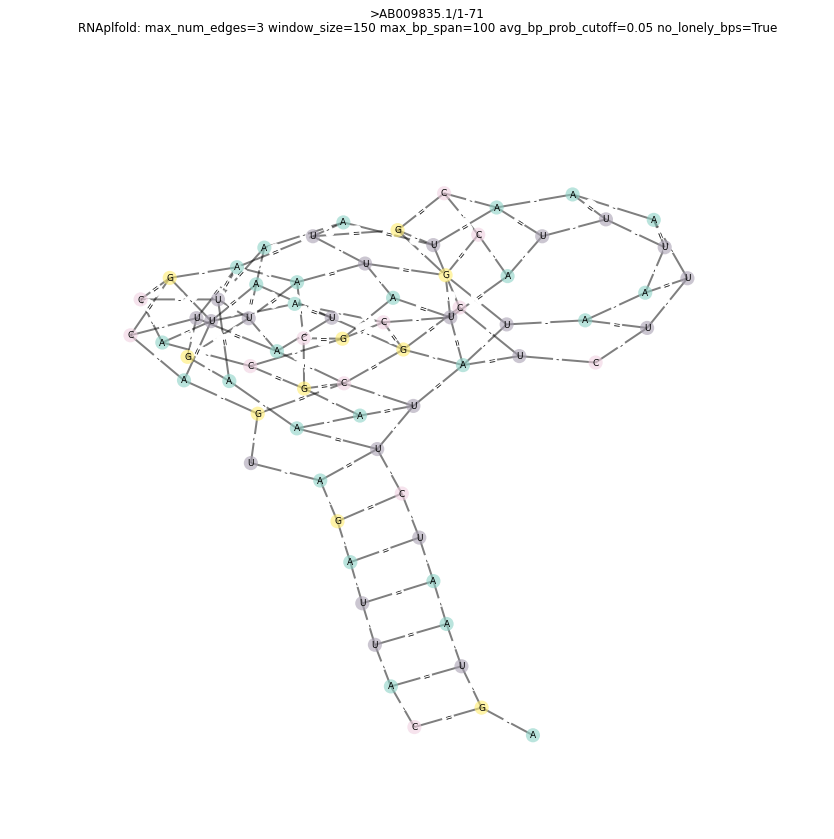

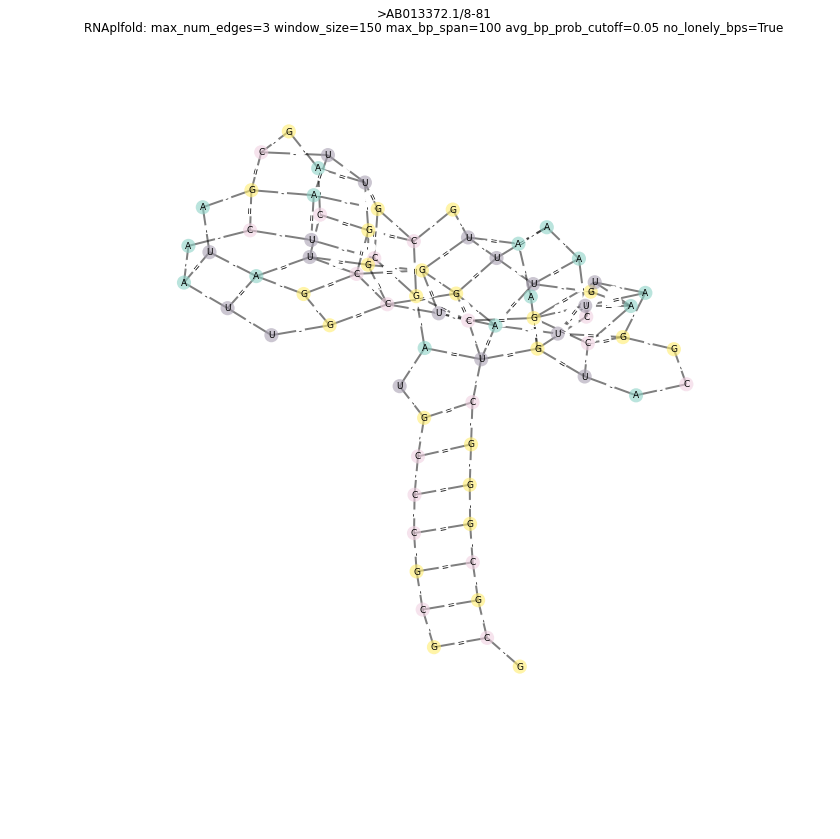

In [15]:
graphs = pre_process(rfam_uri(rfam_id))
my_opt=dict(opts)
my_opt.update({'vertex_color':'level', 'colormap':'Set3'})
plot(graphs,opts=my_opt)

In [16]:
def pre_process(data):
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(data)
    
    from eden.converter.rna.rnashapes import rnashapes_to_eden
    graphs = rnashapes_to_eden(seqs, shape_type=5, energy_range=35, max_num=3, split_components=False)
    
    from eden.modifier.graph import vertex_attributes 
    graphs = vertex_attributes.trapezoidal_reweighting(graphs,
                                                       high_weight = 1, low_weight = 0.0, 
                                                       high_weight_window_start = 25, high_weight_window_end = 35, 
                                                       low_weight_window_start = 15, low_weight_window_end = 45)
    return graphs

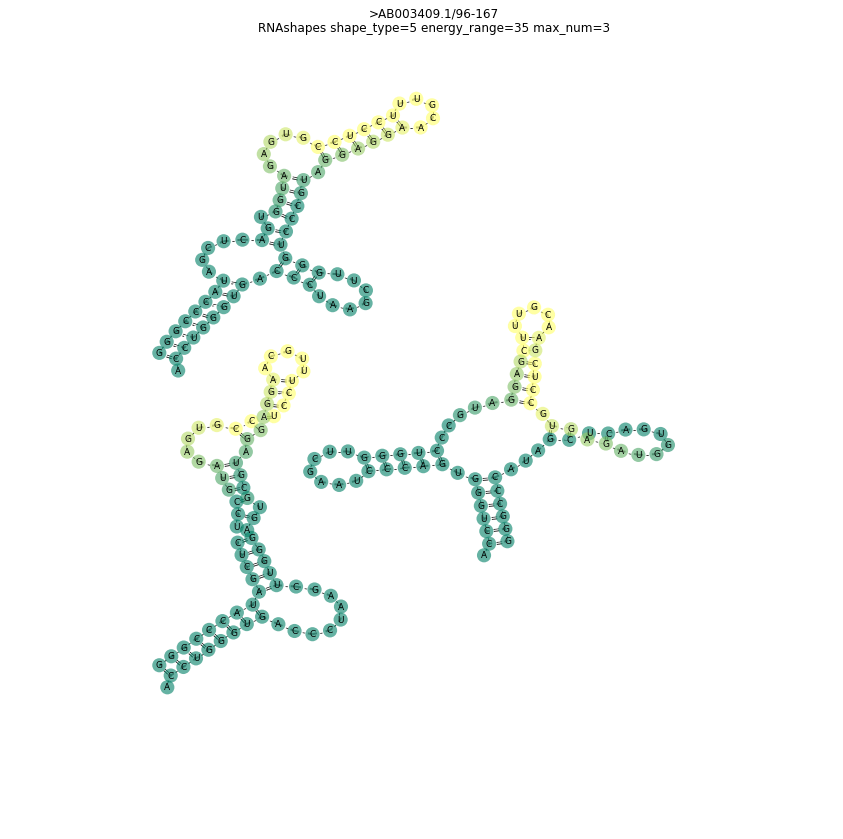

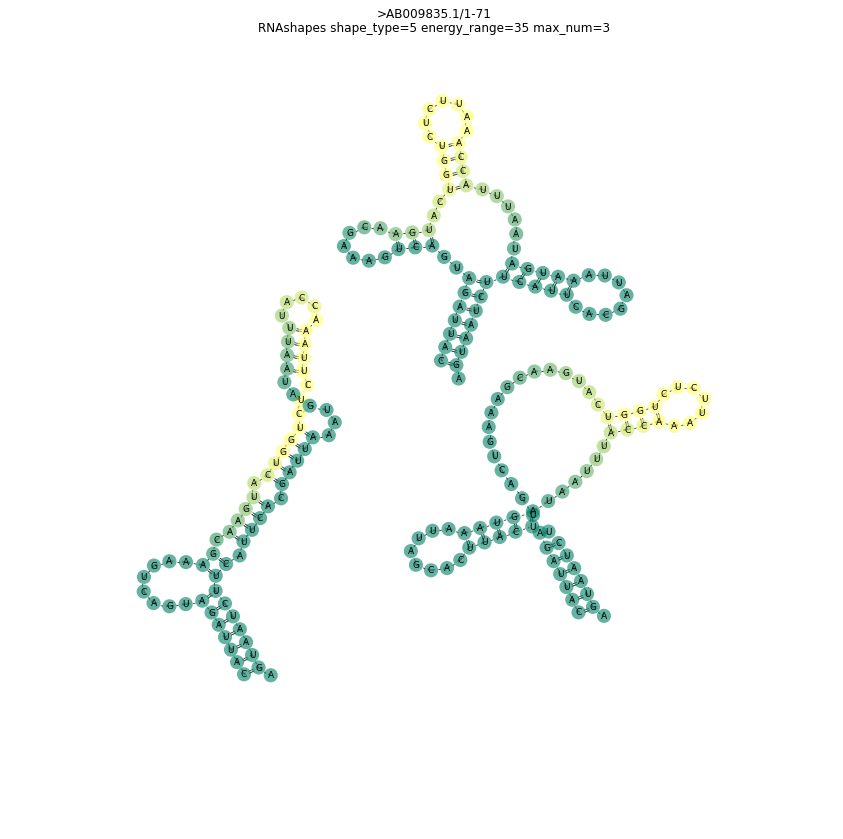

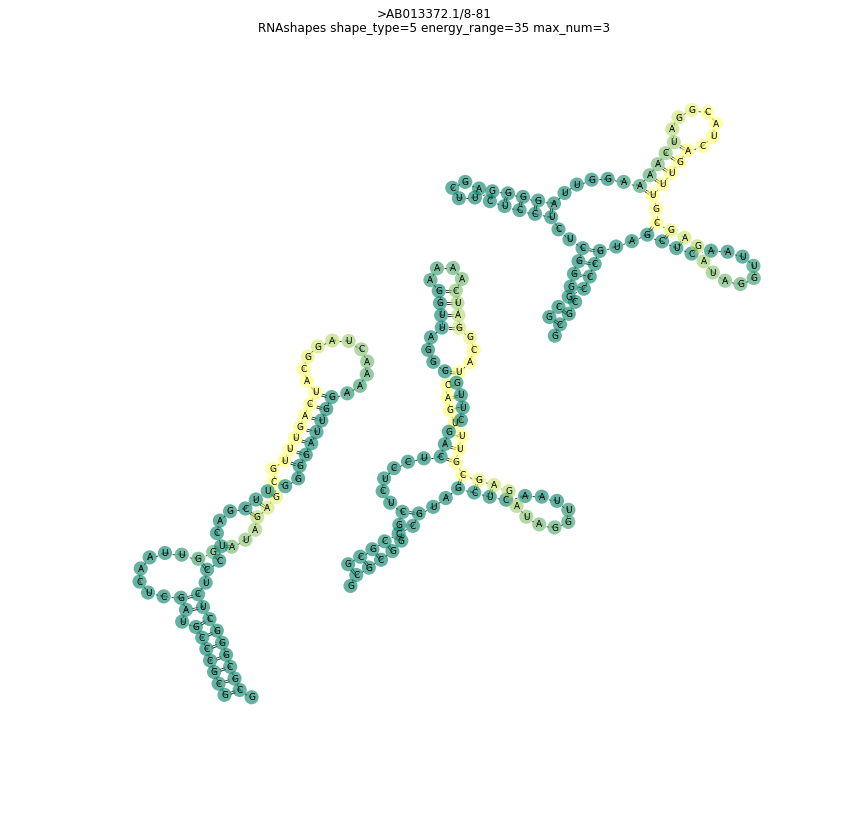

In [17]:
graphs = pre_process(rfam_uri(rfam_id))
my_opt=dict(opts)
my_opt.update({'vertex_color':'weight', 'colormap':'summer'})
plot(graphs,opts=my_opt)

In [18]:
def pre_process(data):
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(data)
    
    from eden.converter.rna.rnasubopt import rnasubopt_to_eden
    graphs = rnasubopt_to_eden(seqs, energy_range=10, max_num=3, split_components=False)
    
    from eden.modifier.graph import vertex_attributes 
    graphs = vertex_attributes.trapezoidal_reweighting(graphs,
                                                       high_weight = 1, low_weight = 0.0, 
                                                       high_weight_window_start = 25, high_weight_window_end = 35, 
                                                       low_weight_window_start = 15, low_weight_window_end = 45)
    return graphs

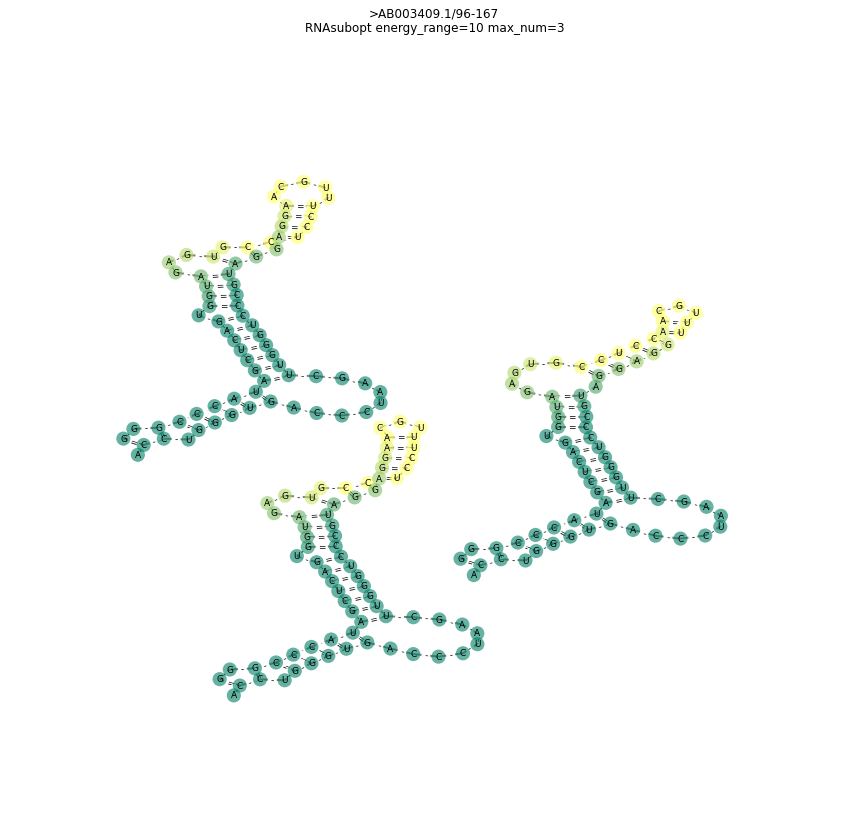

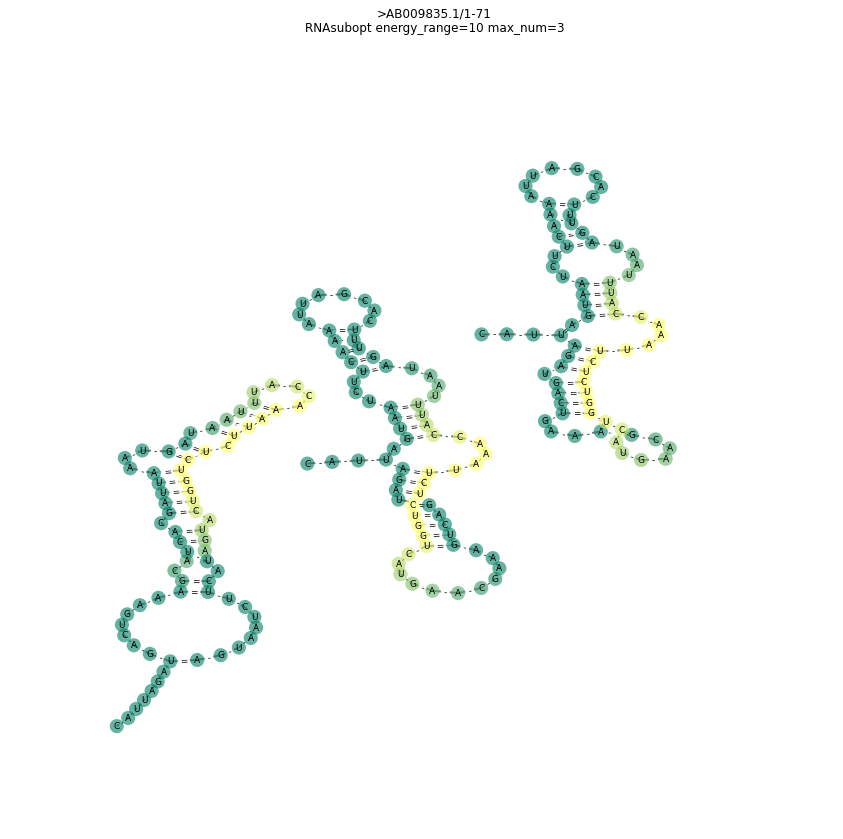

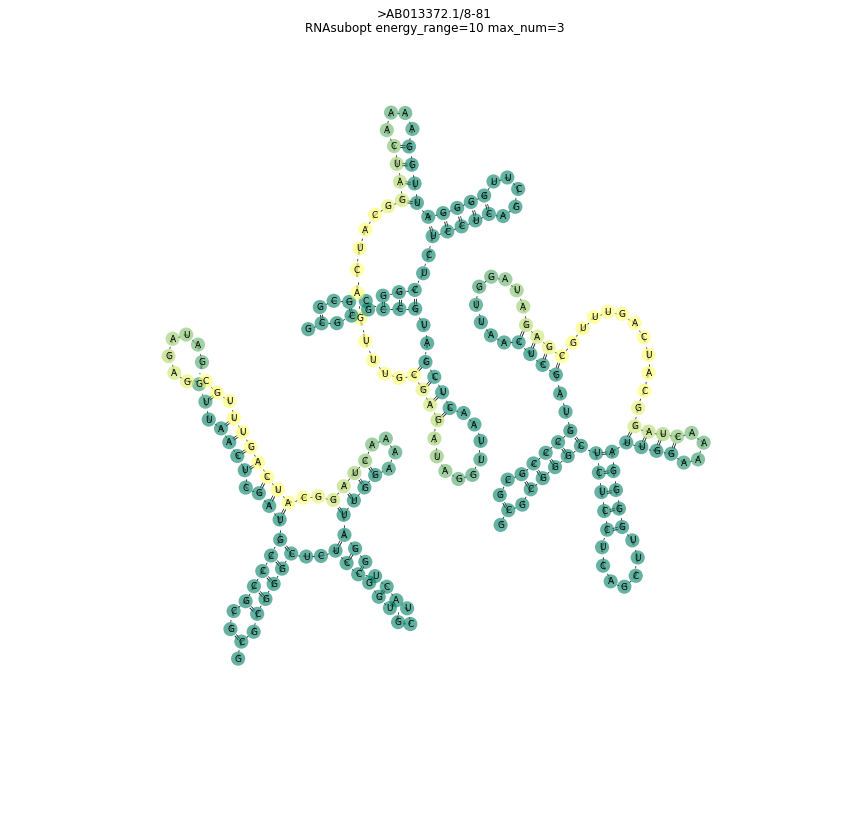

In [19]:
graphs = pre_process(rfam_uri(rfam_id))
my_opt=dict(opts)
my_opt.update({'vertex_color':'weight', 'colormap':'summer'})
plot(graphs,opts=my_opt)

In [16]:
def pre_process(data):
    
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(data)
    
    from eden.converter.rna.rnashapes import rnashapes_to_eden
    graphs = rnashapes_to_eden(seqs, shape_type=5, energy_range=30, max_num=1)
                
    #annotate in node attribute 'type' the incident edges' labels
    from eden.modifier.graph import vertex_attributes
    graphs = vertex_attributes.incident_edge_label(graphs, level = 1, output_attribute = 'type', separator = '.')
    from eden.modifier.graph.structure import contraction, contraction_modifier
    #reduce all 'label' attributes of contracted nodes to a histogram to be written in the 'label' attribute of the resulting graph 
    label_modifier = contraction_modifier(attribute_in='type', attribute_out='label', reduction='set_categorical')
    #reduce all 'weight' attributes of contracted nodes using a sum to be written in the 'weight' attribute of the resulting graph 
    weight_modifier = contraction_modifier(attribute_in='weight', attribute_out='weight', reduction='sum')
    modifiers = [label_modifier, weight_modifier]
    #contract the graph on the 'type' attribute
    graphs = contraction(graphs, contraction_attribute = 'type', modifiers = modifiers, nesting = True)

    from eden.modifier.graph import vertex_attributes 
    graphs = vertex_attributes.colorize(graphs, output_attribute = 'level', labels = ['X','A','U','C','G'])
    
    return graphs

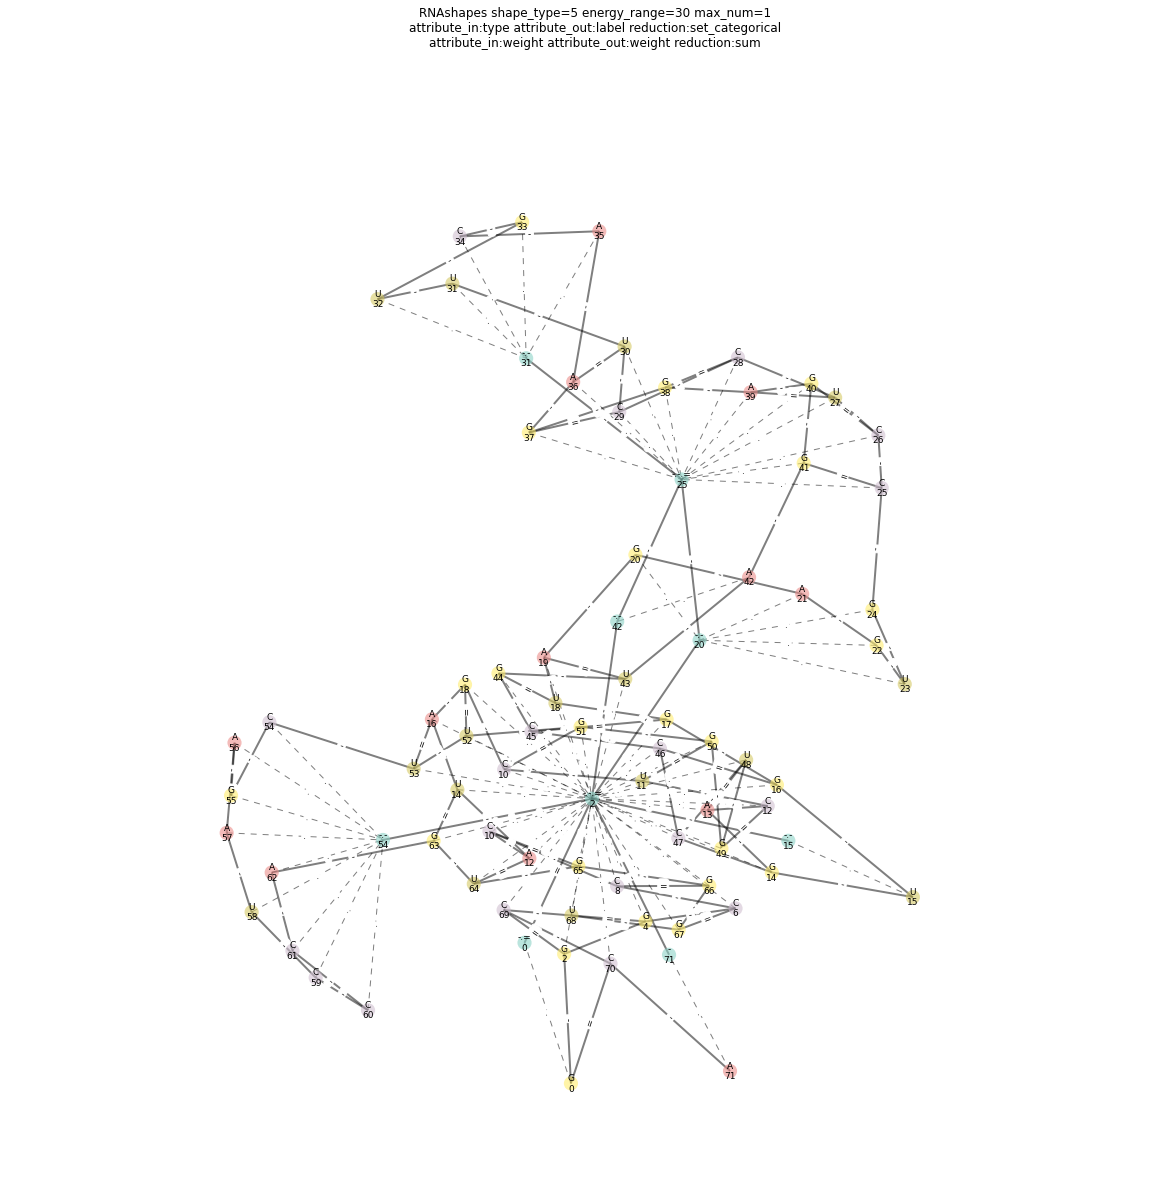

In [17]:
graphs = pre_process(rfam_uri(rfam_id))
my_opt=dict(opts)
my_opt.update({'size':20, 'vertex_color':'level', 'colormap':'Set3'})
plot(graphs,opts=my_opt, num=1)